# Clasificación y Optimización de Hiperparámetros (Core)

<strong>Objetivo:</strong> Implementar un pipeline completo de machine learning para un problema de clasificación utilizando técnicas de preprocesamiento, modelado, y optimización de hiperparámetros. Enfocar especialmente en la limpieza de datos y la optimización utilizando GridSearchCV y RandomizedSearchCV.

<strong>Dataset:</strong> [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

<strong>Descripción del Dataset:</strong> El dataset de costos médicos personales contiene información sobre varios factores que afectan los costos de seguros médicos, como la edad, el sexo, el índice de masa corporal, y el hábito de fumar. Este dataset es ideal para practicar técnicas de preprocesamiento y optimización de modelos debido a la presencia de datos sucios y variables tanto categóricas como numéricas.

## Instrucciones:

### 1. Carga y Exploración Inicial de Datos:

* Cargar el dataset desde Kaggle.
* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
* Identificar y documentar los valores faltantes y outliers en el dataset.

### 2. Preprocesamiento de Datos:

* Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.

### 3. Implementación de Modelos de Clasificación:

* Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.
* Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

### 4. Optimización de Hiperparámetros:

* Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.
* Implementar RandomizedSearchCV como método alternativo de optimización.
* Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

### 5. Evaluación de Modelos:

* Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
* Generar y analizar la matriz de confusión para los modelos optimizados.
* Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

### 6. Documentación y Entrega:

* Documentar todos los pasos del proceso en un notebook de Jupyter, incluyendo explicaciones detalladas y justificaciones para cada decisión tomada.
* Subir el notebook y los resultados a un repositorio de GitHub.
* Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.

# Resolución

## 1. Carga y Exploración Inicial de Datos:

### Cargar el dataset desde Kaggle.

Descargamos el dataset.

In [1]:
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/datasets/mirichoi0218/insurance",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/insurance" (use force=True to force download)


Cargamos el dataset en un dataframe.

In [2]:
import pandas as pd


camino_ds = "../data/insurance/insurance.csv"
df = pd.read_csv(camino_ds, delimiter=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Como se puede ver, existen 7 características y 1338 filas en total en este dataset.

### Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Potencialmente existen en este dataset una columna que es booleana. Por lo que convertimos las columnas correspondientes a booleanas.

In [4]:
from utils.eda_utils import obtener_columnas

columnas = obtener_columnas(df)

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    set([0, 1]),
    set([0.0, 1.0]),
    set(["false", "true"]),
    set(["no", "yes"]),
    set(["no", "si"]),
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no"]:
        return False

    if x in [1, 1.0, "true", "yes", "si"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == posibilidad_valores_booleanos:
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'sex': ['female' 'male']
Valores de columna 'smoker': ['yes' 'no']
La columna 'smoker' es booleana. Será convertida.
Columnas convertidas a booleanas: ['smoker']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   bool   
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.2+ KB


Vemos los valores únicos en sex, region, para ver si se precisa convertir estas columnas a categóricas.

In [6]:
for columna in ["sex", "region"]:
    valores_unicos = df[columna].unique().tolist()
    print(f"Columnas únicas para '{columna}': {str(valores_unicos)}")

Columnas únicas para 'sex': ['female', 'male']
Columnas únicas para 'region': ['southwest', 'southeast', 'northwest', 'northeast']


Limpiamos columnas y las convertimos a categorícas.

In [7]:
from utils.eda_utils import limpiar_cadena


for columna_categorica in ["sex", "region"]:
    df[columna_categorica] = df[columna_categorica].apply(limpiar_cadena)

In [8]:
porcentaje_max_columnas_categoricas = 0.10
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []

for columna in ["sex", "region"]:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (0.1 * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}'")

    del valores_unicos

print(f"\nColumnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")

Cant. únicos para columna 'sex': 2
Valores únicos columna 'sex': ['female', 'male']
Se procede a convertir la columna 'sex' a categórica
Cant. únicos para columna 'region': 4
Valores únicos columna 'region': ['southwest', 'southeast', 'northwest', 'northeast']
Se procede a convertir la columna 'region' a categórica

Columnas convertidas a categóricas: ['sex', 'region']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   bool    
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: bool(1), category(2), float64(2), int64(2)
memory usage: 46.2 KB


#### EDA

##### Histogramas de variables numéricas.

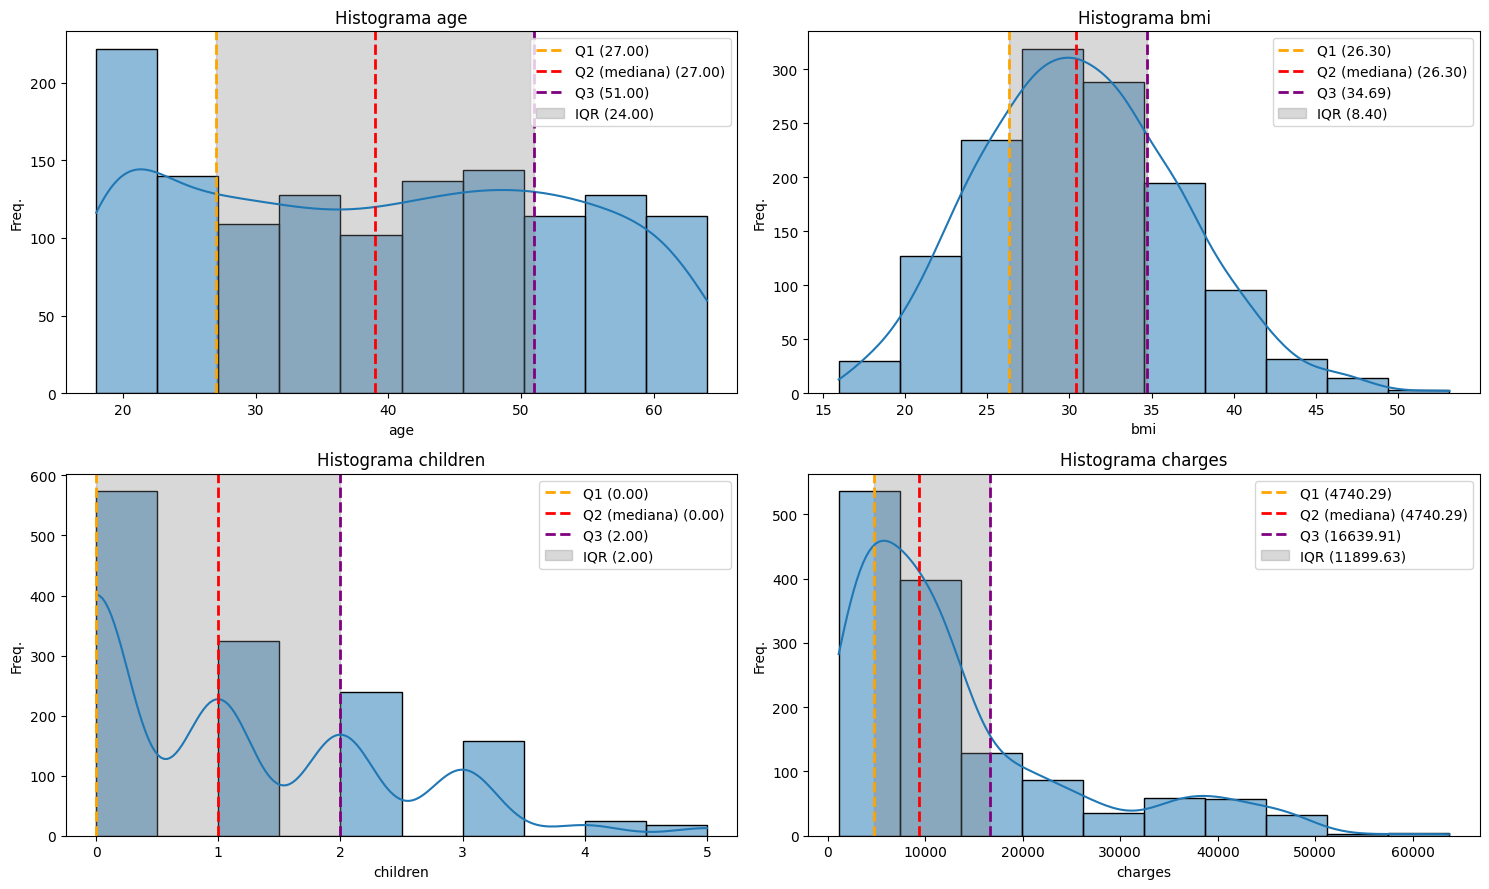

In [10]:
from utils.eda_utils import obtener_columnas_numericas_df, graficar_histogramas

columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas, kde=True, bins=10, nro_columnas=2, figsize=(15, 9))

Se puede notar de los histogramas, que la mayoría de las columnas no sigue una distribución normal.

##### Boxplots de Variables numéricas.

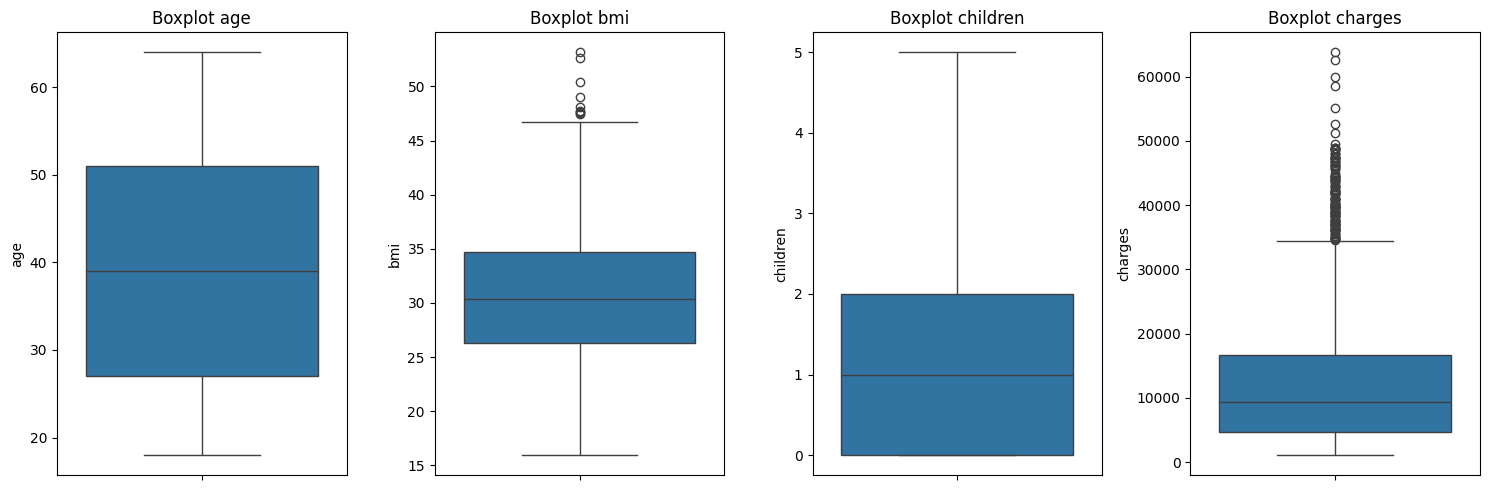

In [11]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, 4, figsize=(15, 5))

Se identifican outliers en la columna bmi. También, se encuentran muchos outliers en la columna charges. En este caso, lo ideal sería usar el RobustScaler como escalador.

##### Gráficos de dispersión vs charges.

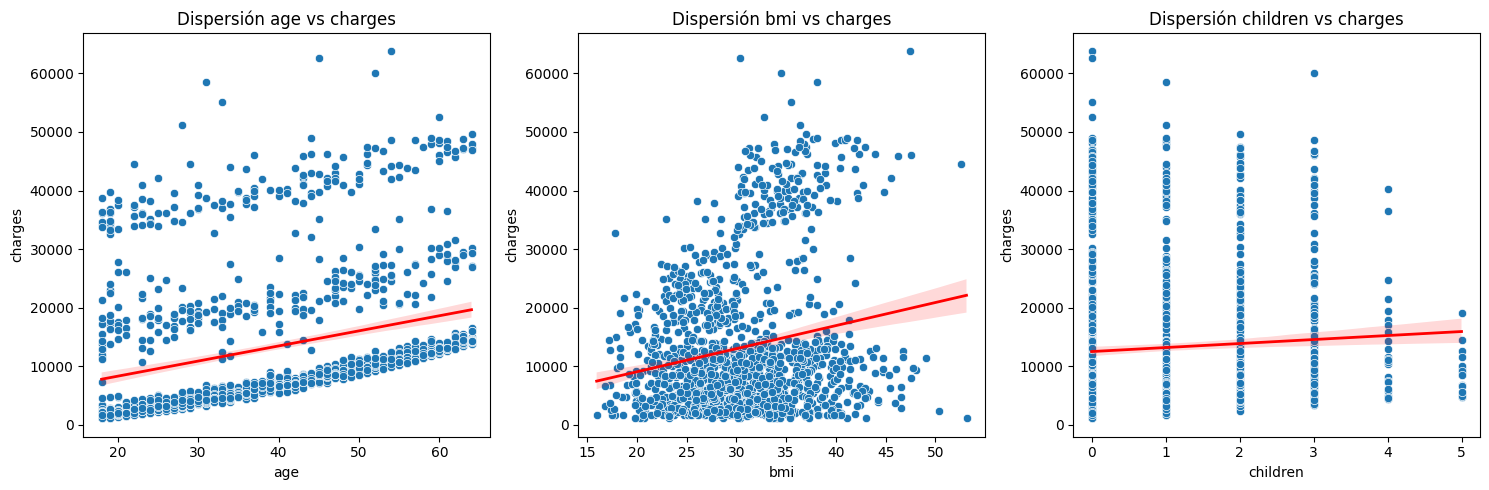

In [14]:
from utils.eda_utils import graficar_dispersiones

graficar_dispersiones(df, columnas_numericas, "charges", figsize=(15, 5))

De estos datos, podemos notar una leve correlación en las columnas, pero de igual manera existe mucha dispersión.

##### Análisis de columnas categóricas.

In [13]:
from utils.eda_utils import obtener_columnas_categoricas_df


columnas_categoricas = obtener_columnas_categoricas_df(df)
columnas_a_analizar = [*columnas_categoricas]

# Tutorial de creación de tabla de frecuencias.
# https://www.youtube.com/watch?v=UGV-GMIHLdY

for columna in columnas_a_analizar:
    print(f"Tabla de frecuencia Columna '{columna}':\n")
    crosstab_column = pd.crosstab(index=df[columna], columns="count", margins=True)
    print(crosstab_column)
    print("\n")
    print(f"Tabla de proporciones totales Columna '{columna}':\n")
    crosstab_column_perc = crosstab_column / crosstab_column.loc["All", "All"]
    print(crosstab_column_perc)
    print("\n")

Tabla de frecuencia Columna 'sex':

col_0   count   All
sex                
female    662   662
male      676   676
All      1338  1338


Tabla de proporciones totales Columna 'sex':

col_0      count       All
sex                       
female  0.494768  0.494768
male    0.505232  0.505232
All     1.000000  1.000000


Tabla de frecuencia Columna 'region':

col_0      count   All
region                
northeast    324   324
northwest    325   325
southeast    364   364
southwest    325   325
All         1338  1338


Tabla de proporciones totales Columna 'region':

col_0         count       All
region                       
northeast  0.242152  0.242152
northwest  0.242900  0.242900
southeast  0.272048  0.272048
southwest  0.242900  0.242900
All        1.000000  1.000000




Notamos de estas tablas de frecuencias que los datos están bien balanceados.

##### Gráfico de variables categóricas.